# Data and libraries

In [ ]:
%cd /content/drive/MyDrive/Data Mining for Business in Python/5. Dimension Reduction

/content/drive/MyDrive/Data Mining for Business in Python 2021/5. Dimension Reduction


In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
#import dataset
dataset = pd.read_csv("houses_to_rent.csv")
dataset.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount
0,1,240,3,3,4,0,acept,furnished,8000
1,0,64,2,1,1,10,acept,not furnished,820
2,1,443,5,5,4,3,acept,furnished,7000
3,1,73,2,2,1,12,acept,not furnished,1250
4,1,19,1,1,0,0,not acept,not furnished,1200


In [ ]:
#transform strings into dummy
dataset[["animal", "furniture"]] = pd.get_dummies(dataset[["animal", "furniture"]],
                                                  drop_first = True)
dataset.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount
0,1,240,3,3,4,0,0,0,8000
1,0,64,2,1,1,10,0,1,820
2,1,443,5,5,4,3,0,0,7000
3,1,73,2,2,1,12,0,1,1250
4,1,19,1,1,0,0,1,1,1200


# Correlation Matrix

In [ ]:
#Isolate X
X = dataset.drop(columns = 'rent amount')
X.head(1)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture
0,1,240,3,3,4,0,0,0


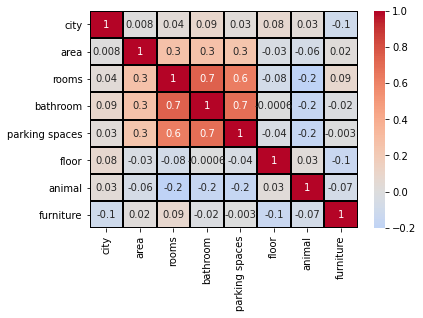

In [ ]:
#Correlation Matrix
import seaborn as sns
sns.heatmap(X.corr(),
            annot = True,
            fmt = '.1g',
            center = 0,
            cmap = 'coolwarm',
            linewidths = 1,
            linecolor = 'black')

#Standardize data

In [ ]:
#Standardization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture
0,1.0,0.009351,0.222222,0.222222,0.333333,0.000000,0.0,0.0
1,0.0,0.002195,0.111111,0.000000,0.083333,0.101010,0.0,1.0
2,1.0,0.017604,0.444444,0.444444,0.333333,0.030303,0.0,0.0
3,1.0,0.002561,0.111111,0.111111,0.083333,0.121212,0.0,1.0
4,1.0,0.000366,0.000000,0.000000,0.000000,0.000000,1.0,1.0


# Principal Component Analysis

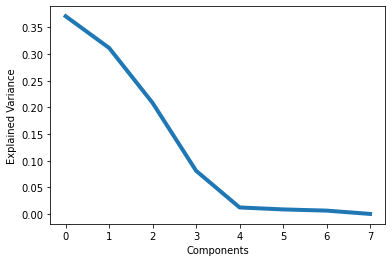

In [ ]:
#Optimal number of components
model = PCA(random_state=1502).fit(X_scaled)
plt.plot(model.explained_variance_ratio_,
         linewidth = 4)
plt.xlabel('Components')
plt.ylabel('Explained Variance')
plt.show()

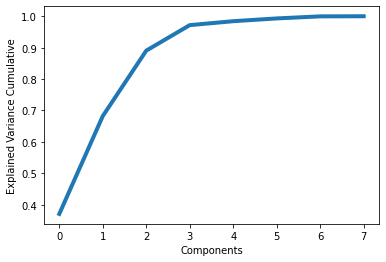

In [ ]:
#cumulative
plt.plot(np.cumsum(model.explained_variance_ratio_),
         linewidth = 4)
plt.xlabel('Components')
plt.ylabel('Explained Variance Cumulative')
plt.show()

In [ ]:
#PCA
model = PCA(n_components=4,
            random_state = 1502).fit(X_scaled)

In [ ]:
#Interpretation 
model_interpretation = pd.DataFrame(model.components_,
                                    columns = X.columns)
model_interpretation

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture
0,0.181418,-0.001894,-0.052840,-0.026016,-0.028430,0.020501,0.513750,-0.835731
1,-0.087693,-0.002332,-0.055603,-0.079433,-0.064195,-0.008521,0.847689,0.510033
2,-0.976331,-0.001294,-0.038218,-0.062905,-0.028570,-0.006666,0.009316,-0.201026
3,-0.075883,0.020620,0.487555,0.685306,0.518733,-0.011778,0.131167,-0.005982


In [ ]:
#components
components = model.transform(X_scaled)
components = pd.DataFrame(components,
                          columns = ['city characteristics',
                                     'accepts animals and has furniture',
                                     'rural small place',
                                     'fantastic houses'])
components.head()

,city characteristics,accepts animals and has furniture,rural small place,fantastic houses
0,0.512212,-0.606922,0.001389,0.138911
1,-0.484093,0.029839,0.801398,-0.128672
2,0.495294,-0.637207,-0.021295,0.399360
3,-0.305152,-0.066853,-0.182058,-0.128640
4,0.217248,0.802227,-0.158314,-0.169636


In [ ]:
#merge the dataset
final_dataset = pd.concat([components, dataset], axis = 1)
final_dataset.head()

,city characteristics,accepts animals and has furniture,rural small place,fantastic houses,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount
0,0.512212,-0.606922,0.001389,0.138911,1,240,3,3,4,0,0,0,8000
1,-0.484093,0.029839,0.801398,-0.128672,0,64,2,1,1,10,0,1,820
2,0.495294,-0.637207,-0.021295,0.399360,1,443,5,5,4,3,0,0,7000
3,-0.305152,-0.066853,-0.182058,-0.128640,1,73,2,2,1,12,0,1,1250
4,0.217248,0.802227,-0.158314,-0.169636,1,19,1,1,0,0,1,1,1200


#Manifold Learning

In [ ]:
#t-SNE
from sklearn.manifold import TSNE
model = TSNE(n_components = 2,
             random_state = 1503)
components = model.fit_transform(X)
components

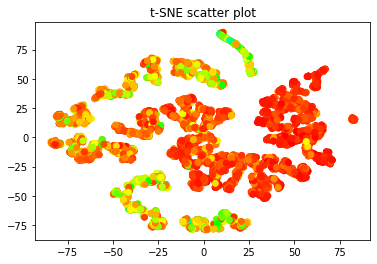

In [ ]:
#Plotting
plt.scatter(components[:,0],
            components[:,1],
            cmap = "hsv",
            c = dataset["rent amount"])
plt.title("t-SNE scatter plot")
plt.show()